# Univariate Distribution

> In this post, we will show the basic usage of tensorflow probability (tfp), and how to make univariate distribution. This is the summary of lecture "Probabilistic Deep Learning with Tensorflow 2" from Imperial College London

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Coursera, Tensorflow_probability, ICL]
- image: images/bernoulli.png

[Tensorflow Probability](https://www.tensorflow.org/probability) (tfp for short) is a library for probabilistic reasoning and statistical analysis in Tensorflow. It is a part of wide ecosystem of Tensorflow, so it can easily combined with Tensorflow core.

## Packages

In [6]:
import tensorflow as tf
import tensorflow_probability as tfp

import numpy as np
import matplotlib.pyplot as plt

tfd = tfp.distributions
plt.rcParams['figure.figsize'] = (10, 6)

In [7]:
print("Tensorflow Version: ", tf.__version__)
print("Tensorflow Probability Version: ", tfp.__version__)

Tensorflow Version:  2.4.0
Tensorflow Probability Version:  0.11.1


## Univariate Distribution

From wikipedia,

> In In statistics, a univariate distribution is a probability distribution of only one random variable. This is in contrast to a multivariate distribution, the probability distribution of a random vector (consisting of multiple random variables).

### Normal Distribution

One of simple univariate distributions is Normal Distribution (also known as Gaussian Distribution). We can create it with tensorflow probability.

In [9]:
# Create a normal distribution from tensorflow distributions
normal = tfd.Normal(loc=0, scale=1)
normal

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

Note that `loc` stands for mean($\mu$) of distribution, and `scale` is standard distribution ($\sigma$) of distribution. After that, we create the normal distribution object. In order to generate the data from normal distribution, we need to `sample` from it.

In [10]:
normal.sample()

<tf.Tensor: shape=(), dtype=float32, numpy=0.9464462>

Or it can generate multiple samples.

In [11]:
normal.sample(5)

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([-0.73940355,  0.79343444,  0.29724854,  0.6113488 ,  0.02649165],
      dtype=float32)>

If we generate 10000 samples and plot it, its shape will be bell-shaped.

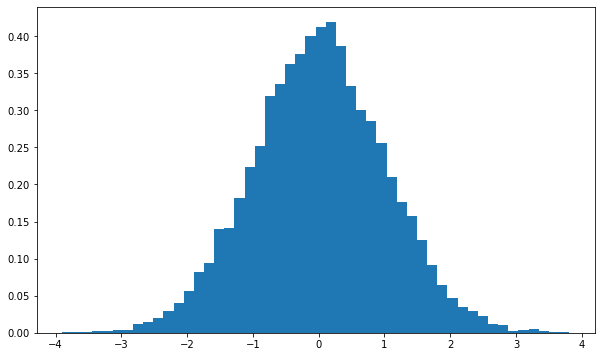

In [18]:
plt.hist(samples.numpy(), bins=50, density=True)
plt.show()

If you're familiar with statistics, the probability of each sample can be expressed.

In [19]:
normal.prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.3989423>

Or you can use log probability.

In [20]:
normal.log_prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.9189385>

### Exponential distribution

Another example of univariate distribution is exponential distribution. This distribution has controllable parameter called $\lambda$, and can be expressed like this,

$$ f(x; \lambda) \begin{cases} \lambda e^{-\lambda x} & x \ge 0, \\ 0 & x < 0 \end{cases} $$

In [21]:
exponential = tfd.Exponential(rate=1)

In [23]:
exponential.sample(5)

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.23124246, 0.28650132, 0.10770323, 0.6426723 , 0.34070757],
      dtype=float32)>

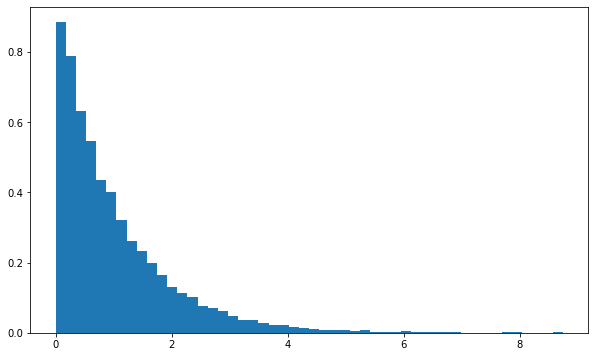

In [22]:
plt.hist(exponential.sample(10000).numpy(), bins=50, density=True)
plt.show()

### Bernoulli Distribution

Bernoulli Distribution is also a family of univariate distribution. All we need to describe this distribution is the probabiltiy that 1 is occurred. Otherwise, 0 will be occurred.

$$ f(x; p) = \begin{cases} p & \text{if } k=1, \\ q = 1 - p & \text{if } k = 0 \end{cases} $$

In [24]:
bernoulli = tfd.Bernoulli(probs=0.8)

In [25]:
bernoulli.sample(5)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 0, 1, 1, 1])>

This distribution generates only two data, 0 and 1.

In [26]:
for k in [0, 0.5, 1, -1]:
    print('Probability result {} for k = {}'.format(bernoulli.prob(k), k))

Probability result 0.20000000298023224 for k = 0
Probability result 0.4000000059604645 for k = 0.5
Probability result 0.800000011920929 for k = 1
Probability result 0.05000000074505806 for k = -1


We already define the probability of 1 to 0.8, so the probability of 0 will be 0.2. You can see that the probability of unexpected data will be strange probability.

### Batch Distributions

The advantage of tensorflow distribution is that it can easily make batch data from specific distribution.

In [27]:
bernoulli_batch = tfd.Bernoulli(probs=[0.1, 0.25, 0.5, 0.75, 0.9])

In [28]:
bernoulli_batch

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[5] event_shape=[] dtype=int32>

In [29]:
bernoulli_batch.sample(5)

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[0, 1, 1, 1, 1],
       [0, 0, 0, 1, 1],
       [0, 1, 1, 0, 1],
       [0, 0, 1, 1, 1],
       [0, 0, 1, 0, 1]])>

We can make 2D batch samples using higher rank as probs.

In [30]:
probs = [[[0.5, 0.5], 
          [0.8, 0.3], 
          [0.25, 0.75]]]
bernoulli_batch_2D = tfd.Bernoulli(probs=probs)
bernoulli_batch_2D

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[1, 3, 2] event_shape=[] dtype=int32>

In [31]:
bernoulli_batch_2D.sample(5)

<tf.Tensor: shape=(5, 1, 3, 2), dtype=int32, numpy=
array([[[[1, 1],
         [1, 0],
         [0, 1]]],


       [[[1, 1],
         [0, 1],
         [0, 1]]],


       [[[0, 1],
         [1, 0],
         [0, 0]]],


       [[[1, 1],
         [1, 0],
         [0, 0]]],


       [[[1, 0],
         [1, 0],
         [0, 1]]]])>

In [32]:
bernoulli_batch_2D.prob([[[1, 0], 
                         [0, 0], 
                         [1, 1]]])

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[0.5 , 0.5 ],
        [0.2 , 0.7 ],
        [0.25, 0.75]]], dtype=float32)>